In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..', './'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [45]:
import lib.utils as u
import pandas as pd
import json
from web3 import Web3


## Создать среду
- сначала установить miniconda или anaconda, работать будем в них
- когда установили надо создать среду по конфигу из файла = conda-env create --file ./configs/env_hist.yml

## Cобираем цены
- регистрируемся в [разделе для разработчиков](https://www.coingecko.com/en/developers/dashboard) и берем там апи-ключ
- читаем документацию на [сайте](https://docs.coingecko.com/v3.0.1/reference/introduction), раздел [апи](https://docs.coingecko.com/v3.0.1/reference/coins-list)
- кладем ключ в конфиг с ключами

In [3]:
import requests

In [4]:
url = u.url['cgk'] + 'coins/list'
headers = {
        'Accepts': 'application/json',
        'x-cg-demo-api-key': u.keys['cgk'],
    }
response = requests.get(url=url, headers=headers)
#response.json()
response = \
pd.DataFrame.from_records(response.json())

In [5]:
headers = {
        'Accepts': 'application/json',
        'x-cg-demo-api-key': u.keys['cgk'],
    }
response = requests.get(url= u.url['cgk']+'coins/markets'+'/?vs_currency=usd', headers=headers)
response = \
pd.DataFrame.from_records(response.json())

In [6]:
response.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,83733.00000,1661634512135,1,1661635516904,2.715546e+10,84497.000000,...,1.984499e+07,2.100000e+07,108786.00,-23.21984,2025-01-20T09:11:54.494Z,67.810000,1.230779e+05,2013-07-06T00:00:00.000Z,None,2025-04-01T13:46:38.425Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,1872.94000,226102481597,2,226102481597,1.502751e+10,1888.400000,...,1.206595e+08,NaN,4878.26,-61.69296,2021-11-10T14:24:19.604Z,0.432979,4.314955e+05,2015-10-20T00:00:00.000Z,"{'times': 28.95072275369384, 'currency': 'btc'...",2025-04-01T13:46:33.745Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.99979,143963967585,3,143963967585,2.489390e+10,0.999967,...,1.439930e+11,NaN,1.32,-24.43506,2018-07-24T00:00:00.000Z,0.572521,7.463047e+01,2015-03-02T00:00:00.000Z,None,2025-04-01T13:46:33.953Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.15000,124917751932,4,214584909994,3.711754e+09,2.190000,...,9.998630e+10,1.000000e+11,3.40,-36.99076,2018-01-07T00:00:00.000Z,0.002686,7.961604e+04,2014-05-22T00:00:00.000Z,None,2025-04-01T13:46:39.062Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,613.93000,89607481224,5,89607481224,9.938126e+08,617.970000,...,1.458876e+08,2.000000e+08,788.84,-22.32999,2024-12-04T10:35:25.220Z,0.039818,1.538650e+06,2017-10-19T00:00:00.000Z,None,2025-04-01T13:46:39.080Z


In [7]:
id_ = 'bitcoin'
url = "https://api.coingecko.com/api/v3/coins/%s/market_chart?vs_currency=usd&days=1"%id_ 

response = requests.get(url, headers=headers)
#response = \
pd.DataFrame.from_dict(response.json())

,prices,market_caps,total_volumes
0,"[1743429050179, 81709.73455168994]","[1743429050179, 1621064628498.2488]","[1743429050179, 24143128628.9725]"
1,"[1743429360450, 82428.00937505778]","[1743429360450, 1634810072102.926]","[1743429360450, 24524131589.70714]"
2,"[1743429643519, 82553.4254041944]","[1743429643519, 1638328666572.0774]","[1743429643519, 24441967895.806602]"
3,"[1743429933173, 82811.68571273073]","[1743429933173, 1638328666572.0774]","[1743429933173, 24322518508.549995]"
4,"[1743430222577, 83214.60403953418]","[1743430222577, 1643356165879.5422]","[1743430222577, 25096340021.953056]"
...,...,...,...
281,"[1743514275752, 83652.5796782439]","[1743514275752, 1661180387697.6243]","[1743514275752, 24936378396.5013]"
282,"[1743514606348, 83452.22121900173]","[1743514606348, 1658890221482.3176]","[1743514606348, 26727465449.774834]"
283,"[1743514909953, 83773.60573726465]","[1743514909953, 1657118805780.6772]","[1743514909953, 26824191376.53128]"
284,"[1743515174505, 83665.83778674938]","[1743515174505, 1661634512135.2444]","[1743515174505, 27139646334.610363]"


<Axes: xlabel='timestamp'>

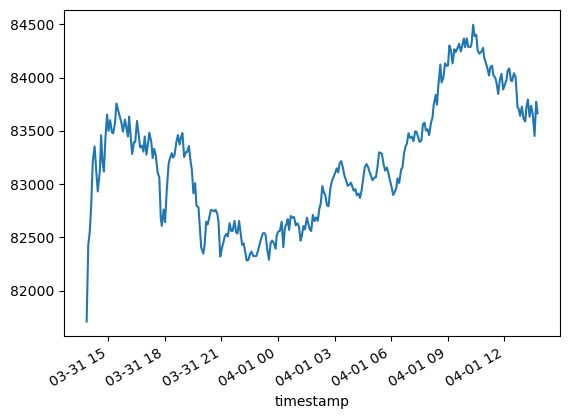

In [23]:
d = response.json()
d = [(date, key, value) for key,tuples in d.items() for date, value in tuples]
d = pd.DataFrame(d).groupby([0,1]).agg({2:'min'}).unstack()[2].reset_index()
d[0] = pd.to_datetime(d[0], unit='ms')
d.columns = ('timestamp', 'market_caps', 'prices', 'total_volumes')
d.set_index('timestamp')['prices'].plot()

## Cобираем транзы
 - вытаскиваем логи

In [98]:
payload = {
    "jsonrpc": "2.0",
    "method": "eth_getBlockByNumber",
    "params": ["latest", True],  
    "id": 1
}

headers = {"Content-Type": "application/json"}
response = requests.post(u.url['infura'], headers=headers, data=json.dumps(payload))
response = response.json()['result']

In [122]:
tx = pd.DataFrame.from_records(response['transactions'])
tx


,accessList,blockHash,blockNumber,chainId,from,gas,gasPrice,hash,input,maxFeePerGas,maxPriorityFeePerGas,nonce,r,s,to,transactionIndex,type,v,value,yParity
0,[{'address': '0x2a20d879fe0046f9412a9ee19a9645...,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,0x2befa,0x8ebf01d4,0x36b14e522fd4fd44de8b362ffb8414f5157dbb309037...,0x041c2a20d879fe0046f9412a9ee19a96454d6d4a1174...,0x8ebf01d4,0x1,0x42ea2c,0x8b2ce52e29d92c3fd3658cdf54e42970108c65084706...,0x342978ad647abcdb6909e6957382e85d71ab77d2eae7...,0x1f2f10d1c40777ae1da742455c65828ff36df387,0x0,0x2,0x1,0x2b77fa6f3,0x1
1,[],0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0xbaa114fbdeec35a8b0293cfc8ebf22ed6e4195c3,0x3f0cc,0xc1aa522d,0x44d1d7a135d51c0bc190b8b86c121b4825b3f396acdd...,0x0dc4bdae000000000000000000000000000000000000...,0xcf5a4acc,0x32eb5059,0xea,0x309af5767146ea8d5bc84db10202ab6c75a9fb4ac7b6...,0x4000fc1075b348b520691559d4d4e9491292642d8f0e...,0x00000047bb99ea4d791bb749d970de71ee0b1a34,0x1,0x2,0x1,0x20d72443247c000,0x1
2,[{'address': '0x267c961446c1d47929da4c8b7f0903...,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,0x2521e,0x29fccd076b,0x8916416a0520a829e3c1a0b4f3cc5624f90cf08108b3...,0x7c3c267c961446c1d47929da4c8b7f090322382dc63b...,0x29fccd076b,0x29fccd076a,0x42ea2d,0x89493563f4f5219a785ca4b20495d01c8ba7e1274cf8...,0x40c7a357006d97464719908f0e05289ac40406cd8c36...,0x1f2f10d1c40777ae1da742455c65828ff36df387,0x2,0x2,0x1,0x2fcc9b1f3,0x1
3,[],0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0xcd086f834979e4b950cfed58723f33e7538ec778,0x30d40,0x536d6c9d4,0x9d99883f11ad69f4960e2737e2f6e8e24678d104b72d...,0x095ea7b3000000000000000000000000c465cc50b7d5...,0x78ae2add4,0x4a817c800,0x6f0,0x1e0b31747981faa6e950c115b6fad6fd7591577d2d2a...,0x648081ad2ff5ff4d08eae5ce7a1fe60873a606547af1...,0x1775f283ae8a19db82f5b9f5f8c2f570e3252e44,0x3,0x2,0x1,0x0,0x1
4,[],0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0xa4b766c119715f92ce54dd0234a946d60d5de8c3,0x77e77,0x2e2cae5d4,0xfe7b7c523f4e412e0aa85ffb6f523e046a865a6caf29...,0x75713a08000000000000000000000000b2d4c640935d...,0x40cd0d7d4,0x2540be400,0x1ed,0x477b1385b7dac8aee60c8d672716af11ae4d66e395a5...,0x4ee001e404c319cc5ba1999131bcd4507edae0296097...,0x3328f7f4a1d1c57c35df56bbf0c9dcafca309c49,0x4,0x2,0x0,0x0,0x0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,[],0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0xdfd122610a14ac12d934898c02dbec1f72708116,0x48c1a,0x8ec5c6cb,0x12f494755be0d2066a8251c9135b8cdfda606a624d92...,0x488c3591000000000000000000000000000000000000...,0x8ec5c6cb,0x8ec5c6cb,0x29114,0xddc6cc9f7be02b2ad26580b2d3f8ede868252dfce724...,0x28a030699c95bd0b5544ad54287e87b94327cb6263f2...,0xc38e4e6a15593f908255214653d3d947ca1c2338,0x7f,0x2,0x0,0x1744bab32cab400,0x0
128,NaN,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0x46340b20830761efd32832a74d7169b29feb9758,0x55730,0x9d0cc113,0x255c21032b40f2ae70374a5863307425e573c9ba502c...,0x,NaN,NaN,0xd7407c,0xca17cffc1ae73e5ba621fddcce36563d8651a3e0ee4c...,0x78dbecefb704b93421a69c2d448f26355bed585fc1bd...,0xc8dfa18ceeffe0b8802e4e3b31da40416e65b3bf,0x80,0x0,0x25,0xa8c3ba10c3f000,NaN
129,NaN,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0x46340b20830761efd32832a74d7169b29feb9758,0x55730,0x9d0cc113,0x437cd022e167a10d428bfdf36df2a0f008a441b4e26e...,0xa9059cbb000000000000000000000000a49ce5db021d...,NaN,NaN,0xd7407d,0x4c4407104ea40c6dacb15d541d888c258dabf94ff99e...,0x1e8518f84db056b9d399dbf56a57ac3217b73085a3cb...,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x81,0x0,0x25,0x0,NaN
130,NaN,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x1,0x46340b20830761efd32832a74d7169b29feb9758,0x55730,0x9d0cc113,0xeeda90049d9143aaf0817a8feb38b078bb44918f3180...,0x,NaN,NaN,0xd7407e,0x9a6a73e97327766ce625287e5544ed8d373eed1d83be...,0x6c82ad568074d130b16e9

In [123]:
tx = tx['hash'].values
tx_ = '0x0ad80864068714fec12db85e50e27bbd0998cddde094b117f4bcee4d2a201b17'

def get_tx(tx):
    payload = {
    "jsonrpc": "2.0",
    "method": "eth_getTransactionReceipt",
    "params": [tx], 
    "id": 1
    }
    headers = {"Content-Type": "application/json"}
    response = requests.post(u.url['infura'], headers=headers, data=json.dumps(payload))
    try:
        response = response.json()['result']
        return response
    except:
        return response

tx_ = get_tx(tx_)
tx_

{'blockHash': '0xbfd30dd5a6df9c204a530f36cf386dff9a0ec3adc04dc93a27f56cde8e5aac42',
 'blockNumber': '0x1525bde',
 'contractAddress': None,
 'cumulativeGasUsed': '0x251bc',
 'effectiveGasPrice': '0x7555cd2b',
 'from': '0x4603180bbb8221157880afaa84638e0fc467738d',
 'gasUsed': '0x251bc',
 'logs': [{'address': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
   'blockHash': '0xbfd30dd5a6df9c204a530f36cf386dff9a0ec3adc04dc93a27f56cde8e5aac42',
   'blockNumber': '0x1525bde',
   'data': '0x000000000000000000000000000000000000000000000001893988c69f3d4bce',
   'logIndex': '0x0',
   'removed': False,
   'topics': ['0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef',
    '0x00000000000000000000000088e6a0c2ddd26feeb64f039a2c41296fcb3f5640',
    '0x000000000000000000000000a69babef1ca67a37ffaf7a485dfff3382056e78c'],
   'transactionHash': '0x0ad80864068714fec12db85e50e27bbd0998cddde094b117f4bcee4d2a201b17',
   'transactionIndex': '0x0'},
  {'address': '0xa0b86991c6218b36c1d19d4a2e9eb0ce

In [124]:
tmp = [j for i in tx[:10] for j in get_tx(i)['logs']]

In [118]:
pd.DataFrame.from_records(tx)['logs']

0    [{'address': '0xc02aaa39b223fe8d0a0e5c4f27ead9...
1    [{'address': '0xc02aaa39b223fe8d0a0e5c4f27ead9...
2    [{'address': '0x267c961446c1d47929da4c8b7f0903...
3    [{'address': '0x1775f283ae8a19db82f5b9f5f8c2f5...
4    [{'address': '0xb2d4c640935df10c2e5320bf951f00...
5    [{'address': '0x4c9edd5852cd905f086c759e8383e0...
6    [{'address': '0xdac17f958d2ee523a2206206994597...
7    [{'address': '0xc02aaa39b223fe8d0a0e5c4f27ead9...
8    [{'address': '0xb2d4c640935df10c2e5320bf951f00...
9    [{'address': '0x77e06c9eccf2e797fd462a92b6d764...
Name: logs, dtype: object

In [127]:
pd.DataFrame.from_records(tmp).head()

,address,blockHash,blockNumber,data,logIndex,removed,topics,transactionHash,transactionIndex
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x00000000000000000000000000000000000000000000...,0x0,False,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x36b14e522fd4fd44de8b362ffb8414f5157dbb309037...,0x0
1,0x267c961446c1d47929da4c8b7f090322382dc63b,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x00000000000000000000000000000000000000000000...,0x1,False,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x36b14e522fd4fd44de8b362ffb8414f5157dbb309037...,0x0
2,0x2a20d879fe0046f9412a9ee19a96454d6d4a1174,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x00000000000000000000000000000000000000000000...,0x2,False,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x36b14e522fd4fd44de8b362ffb8414f5157dbb309037...,0x0
3,0x2a20d879fe0046f9412a9ee19a96454d6d4a1174,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x00000000000000000000000000000000000000000000...,0x3,False,[0xd78ad95fa46c994b6551d0da85fc275fe613ce37657...,0x36b14e522fd4fd44de8b362ffb8414f5157dbb309037...,0x0
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xf335b41a3765a657b0dcfc97141db7dee9a6cec79d04...,0x1525c25,0x00000000000000000000000000000000000000000000...,0x4,False,[0xe1fffcc4923d04b559f4d29a8bfc6cda04eb5b0d3c4...,0x44d1d7a135d51c0bc190b8b86c121b4825b3f396acdd...,0x1


## Домашка
- что значат поля в логах транзакций?
- выбрать интересный вам контракт
- написать клиент для взаимодействия с провайдерами данных и исполнения апи ключей
- посмотреть чем отличаются разные провайдеры и какие дают методы
- собрать транзакции в которых было взаимодействие с контрактом
- посмотреть какие есть контракты у проекта
- выписать методы контрактов

## Другие провайдеры
- Парсим TheGraph
- Берем данные из нод гугла
- (бонус) поднимаем свою ноду